<a href="https://colab.research.google.com/github/ShwetaAroraKhera/ShwetaAroraKhera/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [ ]:
hh = pd.read_csv('/content/new_data.csv', index_col = 'time_key', parse_dates = True, usecols = ['time_key', 'icp', 'Va'])

In [ ]:
hh.head()

,icp,Va
time_key,,
2021-12-01 00:00:00,0000013092WE7C4,243.6
2021-12-01 00:05:00,0000013092WE7C4,243.7
2021-12-01 00:10:00,0000013092WE7C4,243.5
2021-12-01 00:15:00,0000013092WE7C4,243.3
2021-12-01 00:20:00,0000013092WE7C4,243.0


In [ ]:
hh.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 353938 entries, 2021-12-01 00:00:00 to 2022-01-19 23:55:00
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   icp     353938 non-null  object 
 1   Va      353926 non-null  float64
dtypes: float64(1), object(1)
memory usage: 8.1+ MB


In [ ]:
hh.describe()

,Va
count,353926.000000
mean,242.900240
std,1.692467
min,227.700000
25%,241.900000
50%,243.000000
75%,244.000000
max,249.200000


In [ ]:
hh.isnull().any()

icp    False
Va      True
dtype: bool

In [ ]:
hh.dropna(inplace=True)
#hh.Va.fillna(hh.Va.mean(),inplace=True)

In [ ]:
hh.isnull().any()

icp    False
Va     False
dtype: bool

In [ ]:
hh.index = pd.MultiIndex.from_arrays([hh.index.date, hh.index.time], names=['Date','Time'])

In [ ]:
df = pd.pivot_table(hh, values = 'Va', index = ['Date','icp'], columns = ['Time'], aggfunc="mean")

In [ ]:
df_mean = pd.pivot_table(hh, values = 'Va', index = ['icp'], columns = ['Time'], aggfunc="mean")

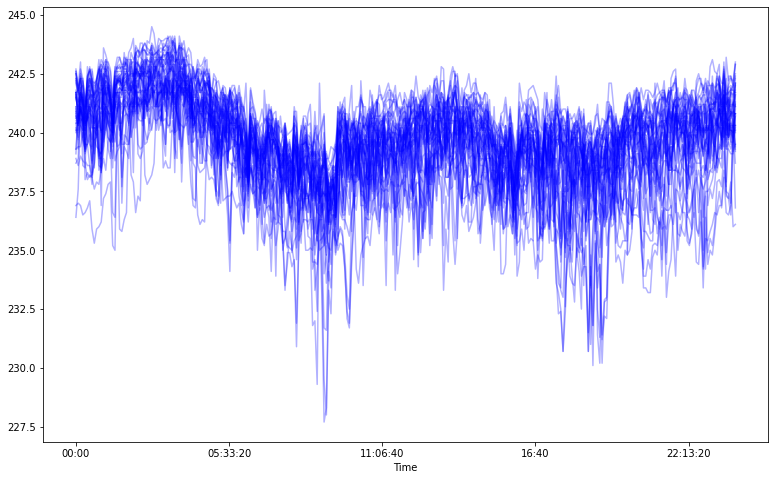

In [ ]:
df_mean.T.plot(figsize=(13,8), legend=False, color='blue', alpha=0.3)

In [ ]:
df_mean_norm = df_mean.apply(lambda s: s / df_mean.max(axis=1)) # normalized voltage

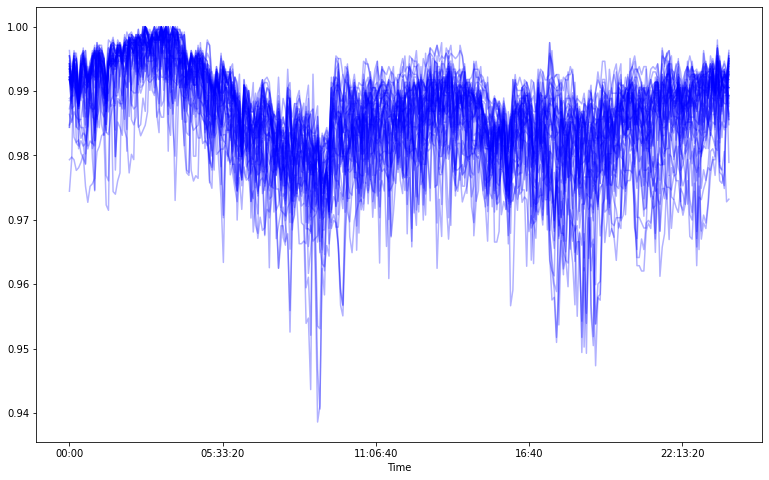

In [ ]:
df_mean_norm.T.plot(figsize=(13,8), legend=False, color='blue', alpha=0.3)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# to determine no. of clusters using elbow
inertias = []
max_clusters=10
for n_clusters in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters).fit(df_mean_norm)
    inertias.append(kmeans.inertia_)

Text(0, 0.5, 'Cost')

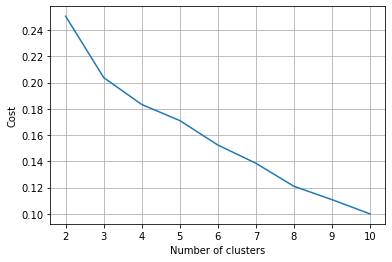

In [ ]:
inertias   = pd.Series(inertias, index=list(range(2, max_clusters+1)))
inertias.plot(grid=True);
plt.xlabel("Number of clusters")
plt.ylabel("Cost")
   

In [ ]:
kmeans = KMeans(n_clusters=3)
cluster_found = kmeans.fit(df_mean_norm)
clust = pd.Series(cluster_found.labels_, index = df_mean_norm.index)

**Cluster Centroids**

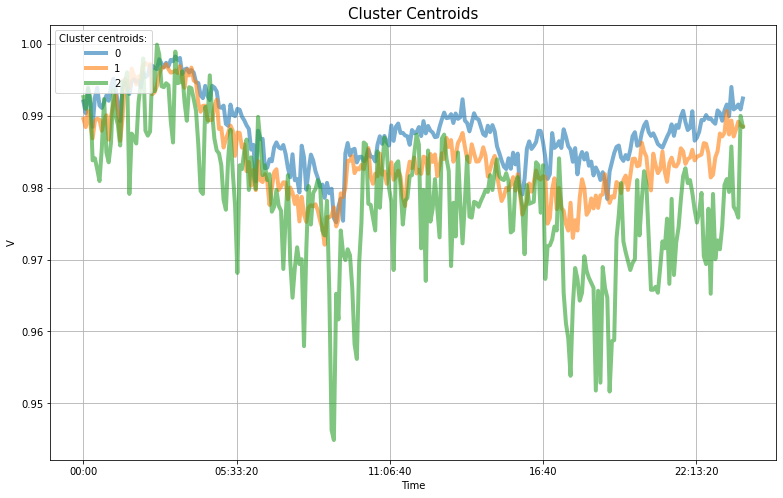

In [ ]:
fig = plt.figure(figsize= (13,8))
df_mean_norm.assign(clust=clust).groupby("clust").mean().T.plot(ax=plt.gca(), lw=4, alpha=0.6)
plt.title("Cluster Centroids", fontsize=15)
plt.xlabel("Time")
plt.ylabel("V", fontsize=10)
plt.legend(title="Cluster centroids:", loc="upper left")
plt.grid()

**Clustered profiles**

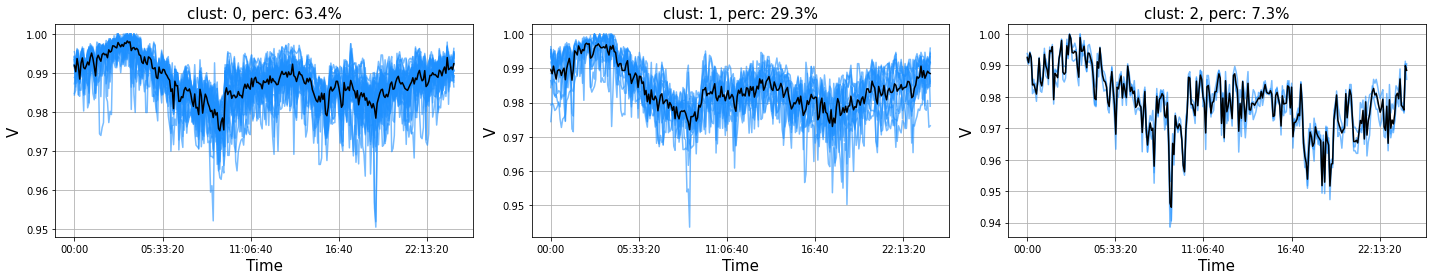

In [ ]:
clust_perc = 100 * clust.value_counts(normalize=True)
n_cols = 3
n_rows = np.ceil(clust.nunique() / n_cols)
fig = plt.figure(figsize=[20, n_rows*4])
for i, clust_n in enumerate(clust_perc.index):
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    df_plot = df_mean_norm[clust== clust_n]
    df_plot.iloc[::].T.plot(ax=plt.gca(), alpha=0.6, color="dodgerblue", legend=False)
    df_plot.mean().plot(ax=plt.gca(), alpha=1, color="k", legend=False)
    plt.title("clust: {}, perc: {:.1f}%".format(clust_n,  clust_perc.loc[clust_n]),fontsize= 15)
    plt.xlabel("Time", fontsize=15)
    plt.ylabel("V", fontsize=15)
    plt.grid()
plt.tight_layout()

**All profiles**

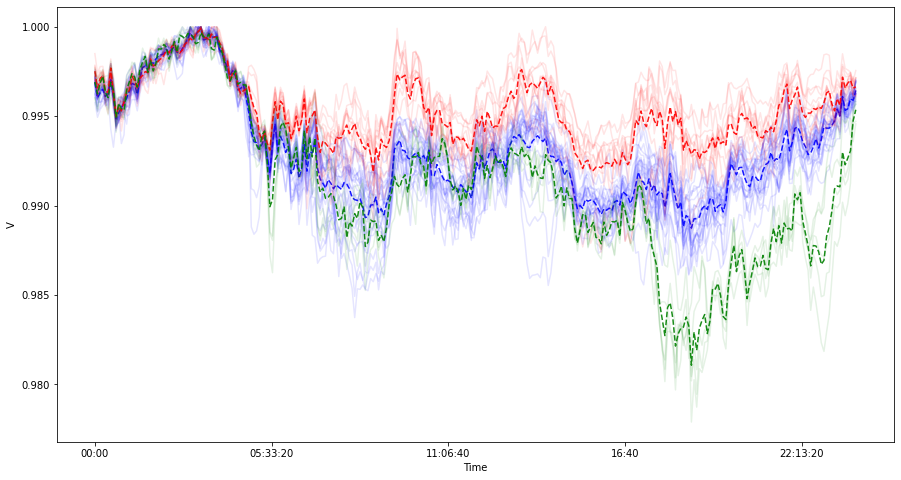

In [ ]:
fig, ax= plt.subplots(1,1, figsize=(15,8))
color_list = ['blue','red','green']
cluster_values = sorted(clust.unique())
for cluster, color in zip(cluster_values, color_list):
    df_plot = df_mean_norm[clust== cluster]
    df_plot.iloc[::].T.plot(ax=ax, legend=False, alpha=0.1, color=color, label= f'Cluster {cluster}')
    df_plot.mean().plot(ax=ax, color=color, alpha=0.9, ls='--' )
    ax.set_ylabel('V')
    ax.set_xlabel('Time')